# PRIVATE CHATGPT

Personal/Organization/Private Data

Build a bot around this

1. Fine tuning - Problem - training is not easy and it is costly, not scalable with the data getting updated
2. Passing the document to the prompt - Problem - Security, context length - cosly
3. Passing the relevant pieces of document to the LLM to write the response

Passing the relevant pieces of document to the LLM to write the response

We need to do some stuff before passing it to the LLM


1. Divide the document
2. store the document
3. find the relevant piece of document
4. pass it to the LLM

1. Divide the document


*   Fixed size Chunking (character, setence)
*   Recurssive Chunking ('\n', '\t')
*   Semantic Chunking
*   Agentic Chunking


Where and How to save the chunk?

Effective chunking strategies for RAG systems involve segmenting documents into meaningful units, such as semantic chunking based on meaning and context, document structure-based chunking using paragraphs and sections, and recursive chunking to adaptively split larger chunks. Other approaches include fixed-size chunking, which is simple but can break sentences, and LLM-based chunking, where an LLM generates semantically isolated chunks. Key considerations include ensuring chunks are within model token limits, preserving semantic meaning by avoiding splits mid-sentence, adding overlap between chunks to maintain context, and testing extensively with real user queries to find the optimal strategy.



## chunk 1
Effective chunking strategies for RAG systems involve segmenting documents into meaningful units, such as semantic chunking based on meaning and context, document structure-based chunking using paragraphs and sections, and recursive chunking to adaptively split larger chunks.

## chunk 2
Other approaches include fixed-size chunking, which is simple but can break sentences, and LLM-based chunking, where an LLM generates semantically isolated chunks. Key considerations include ensuring chunks are within model token limits, preserving semantic meaning by avoiding splits mid-sentence, adding overlap between chunks to maintain context, and testing extensively with real user queries to find the optimal strategy.

## chunk 3
Semantic chunking:
Divides text into chunks based on meaning, such as sentences, paragraphs, or thematic units.
Pros: Better preservation of context and meaning, leading to more accurate retrievals.
Cons: More complex to implement than fixed-size chunking.

## chunk 4
Recursive chunking:
An adaptive method that first uses broader separators (like sections or paragraphs) and then breaks down large chunks into smaller ones if they exceed a specified size limit.
Pros: Balances structure with size constraints, adapting to different document structures.
Cons: Requires careful tuning of separators and size limits.

DataBase

row 1 - chunk1 text - metadata
row 2 - chunk2 text - metadata
row 3 - chunk3 text - metadata
row 4 - chunk4 text - metadata

Saving embedding instead of text is more reliable in terms of context understanding and search capability

row 1 - chunk1 embedding vector - metadata - Vector Database
row 2 - chunk2 embedding vector - metadata - Vector Database
row 3 - chunk3 embedding vector - metadata - Vector Database
row 4 - chunk4 embedding vector - metadata - Vector Database

Vector Database - Quadrant, pinecone, chroma, faiss,

Input : "can you explain me about the recursive chunking?"

find the chunk?

















# RAG - Retreival Augumented Generation

Step 0:
Document loaded
chunk it based on your choice strategies
each chunk converted to a embedding
save each embedding in a vector store DB with each as a row


Step 1:
Input = "explain about chunk?"

Step 2:
convert input question to embedding
input = [34 434 3243 2432 4324 324 234 234 23]

Step 3:
find the cosine similaritry between the input embedding and the documnet chunk embedding

top n chunk

Step 4:

give the input and top n chunk to the LLM to writ the response for you


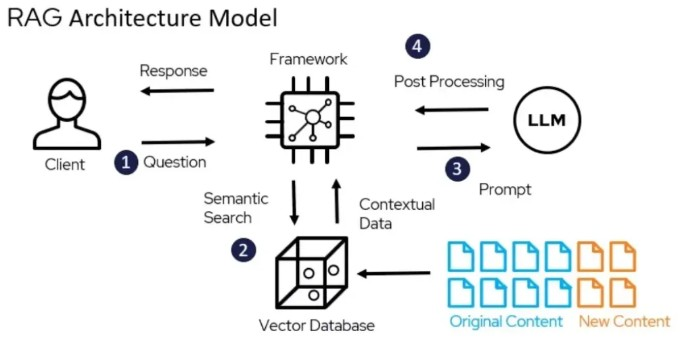

In [ ]:
import os
from google.colab import userdata
os.environ['PINECONE_API_KEY'] = userdata.get('PINECONE_API_KEY')

In [ ]:
!pip install pinecone


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.6/587.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0


In [ ]:
from pinecone import Pinecone

In [ ]:
pc = Pinecone()

In [ ]:
pc.list_indexes()

[]

In [ ]:
index_name = "langchain"
if not pc.has_index(index_name):
    pc.create_index_for_model(
        name=index_name,
        cloud="aws",
        region="us-east-1",
        embed={
            "model":"llama-text-embed-v2",
            "field_map":{"text": "chunk_text"}
        }
    )

In [ ]:
records = [
    { "_id": "rec1", "chunk_text": "The Eiffel Tower was completed in 1889 and stands in Paris, France.", "category": "history" },
    { "_id": "rec2", "chunk_text": "Photosynthesis allows plants to convert sunlight into energy.", "category": "science" },
    { "_id": "rec3", "chunk_text": "Albert Einstein developed the theory of relativity.", "category": "science" },
    { "_id": "rec4", "chunk_text": "The mitochondrion is often called the powerhouse of the cell.", "category": "biology" },
    { "_id": "rec5", "chunk_text": "Shakespeare wrote many famous plays, including Hamlet and Macbeth.", "category": "literature" },
    { "_id": "rec6", "chunk_text": "Water boils at 100°C under standard atmospheric pressure.", "category": "physics" },
    { "_id": "rec7", "chunk_text": "The Great Wall of China was built to protect against invasions.", "category": "history" },
    { "_id": "rec8", "chunk_text": "Honey never spoils due to its low moisture content and acidity.", "category": "food science" },
    { "_id": "rec9", "chunk_text": "The speed of light in a vacuum is approximately 299,792 km/s.", "category": "physics" },
    { "_id": "rec10", "chunk_text": "Newton's laws describe the motion of objects.", "category": "physics" },
    { "_id": "rec11", "chunk_text": "The human brain has approximately 86 billion neurons.", "category": "biology" },
    { "_id": "rec12", "chunk_text": "The Amazon Rainforest is one of the most biodiverse places on Earth.", "category": "geography" },
    { "_id": "rec13", "chunk_text": "Black holes have gravitational fields so strong that not even light can escape.", "category": "astronomy" },
    { "_id": "rec14", "chunk_text": "The periodic table organizes elements based on their atomic number.", "category": "chemistry" },
    { "_id": "rec15", "chunk_text": "Leonardo da Vinci painted the Mona Lisa.", "category": "art" },
    { "_id": "rec16", "chunk_text": "The internet revolutionized communication and information sharing.", "category": "technology" },
    { "_id": "rec17", "chunk_text": "The Pyramids of Giza are among the Seven Wonders of the Ancient World.", "category": "history" },
    { "_id": "rec18", "chunk_text": "Dogs have an incredible sense of smell, much stronger than humans.", "category": "biology" },
    { "_id": "rec19", "chunk_text": "The Pacific Ocean is the largest and deepest ocean on Earth.", "category": "geography" },
    { "_id": "rec20", "chunk_text": "Chess is a strategic game that originated in India.", "category": "games" },
    { "_id": "rec21", "chunk_text": "The Statue of Liberty was a gift from France to the United States.", "category": "history" },
    { "_id": "rec22", "chunk_text": "Coffee contains caffeine, a natural stimulant.", "category": "food science" },
    { "_id": "rec23", "chunk_text": "Thomas Edison invented the practical electric light bulb.", "category": "inventions" },
    { "_id": "rec24", "chunk_text": "The moon influences ocean tides due to gravitational pull.", "category": "astronomy" },
    { "_id": "rec25", "chunk_text": "DNA carries genetic information for all living organisms.", "category": "biology" },
    { "_id": "rec26", "chunk_text": "Rome was once the center of a vast empire.", "category": "history" },
    { "_id": "rec27", "chunk_text": "The Wright brothers pioneered human flight in 1903.", "category": "inventions" },
    { "_id": "rec28", "chunk_text": "Bananas are a good source of potassium.", "category": "nutrition" },
    { "_id": "rec29", "chunk_text": "The stock market fluctuates based on supply and demand.", "category": "economics" },
    { "_id": "rec30", "chunk_text": "A compass needle points toward the magnetic north pole.", "category": "navigation" },
    { "_id": "rec31", "chunk_text": "The universe is expanding, according to the Big Bang theory.", "category": "astronomy" },
    { "_id": "rec32", "chunk_text": "Elephants have excellent memory and strong social bonds.", "category": "biology" },
    { "_id": "rec33", "chunk_text": "The violin is a string instrument commonly used in orchestras.", "category": "music" },
    { "_id": "rec34", "chunk_text": "The heart pumps blood throughout the human body.", "category": "biology" },
    { "_id": "rec35", "chunk_text": "Ice cream melts when exposed to heat.", "category": "food science" },
    { "_id": "rec36", "chunk_text": "Solar panels convert sunlight into electricity.", "category": "technology" },
    { "_id": "rec37", "chunk_text": "The French Revolution began in 1789.", "category": "history" },
    { "_id": "rec38", "chunk_text": "The Taj Mahal is a mausoleum built by Emperor Shah Jahan.", "category": "history" },
    { "_id": "rec39", "chunk_text": "Rainbows are caused by light refracting through water droplets.", "category": "physics" },
    { "_id": "rec40", "chunk_text": "Mount Everest is the tallest mountain in the world.", "category": "geography" },
    { "_id": "rec41", "chunk_text": "Octopuses are highly intelligent marine creatures.", "category": "biology" },
    { "_id": "rec42", "chunk_text": "The speed of sound is around 343 meters per second in air.", "category": "physics" },
    { "_id": "rec43", "chunk_text": "Gravity keeps planets in orbit around the sun.", "category": "astronomy" },
    { "_id": "rec44", "chunk_text": "The Mediterranean diet is considered one of the healthiest in the world.", "category": "nutrition" },
    { "_id": "rec45", "chunk_text": "A haiku is a traditional Japanese poem with a 5-7-5 syllable structure.", "category": "literature" },
    { "_id": "rec46", "chunk_text": "The human body is made up of about 60% water.", "category": "biology" },
    { "_id": "rec47", "chunk_text": "The Industrial Revolution transformed manufacturing and transportation.", "category": "history" },
    { "_id": "rec48", "chunk_text": "Vincent van Gogh painted Starry Night.", "category": "art" },
    { "_id": "rec49", "chunk_text": "Airplanes fly due to the principles of lift and aerodynamics.", "category": "physics" },
    { "_id": "rec50", "chunk_text": "Renewable energy sources include wind, solar, and hydroelectric power.", "category": "energy" }
]

In [ ]:
# Target the index
dense_index = pc.Index(index_name)

# Upsert the records into a namespace
dense_index.upsert_records("FirstInsertion", records)


In [ ]:
# View stats for the index
stats = dense_index.describe_index_stats()
print(stats)

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'FirstInsertion': {'vector_count': 50}},
 'total_vector_count': 50,
 'vector_type': 'dense'}


In [ ]:
new_records = [
    { "_id": "rec51", "chunk_text": "The Sahara Desert is the largest hot desert in the world.", "category": "geography" },
    { "_id": "rec52", "chunk_text": "Pablo Picasso co-founded the Cubist art movement.", "category": "art" },
    { "_id": "rec53", "chunk_text": "The pancreas produces insulin, which regulates blood sugar levels.", "category": "biology" },
    { "_id": "rec54", "chunk_text": "Julius Caesar was assassinated in 44 BCE on the Ides of March.", "category": "history" },
    { "_id": "rec55", "chunk_text": "Bitcoin is a decentralized digital currency based on blockchain.", "category": "technology" },
    { "_id": "rec56", "chunk_text": "The trumpet is a brass instrument commonly used in jazz music.", "category": "music" },
    { "_id": "rec57", "chunk_text": "Pluto was reclassified from a planet to a dwarf planet in 2006.", "category": "astronomy" },
    { "_id": "rec58", "chunk_text": "The human liver can regenerate parts of itself after damage.", "category": "biology" },
    { "_id": "rec59", "chunk_text": "The Cold War was a geopolitical tension between the US and the Soviet Union.", "category": "history" },
    { "_id": "rec60", "chunk_text": "Magnetite is a naturally occurring magnetic mineral.", "category": "geology" },
    { "_id": "rec61", "chunk_text": "The Rubik's Cube is a 3D combination puzzle invented in 1974.", "category": "games" },
    { "_id": "rec62", "chunk_text": "Marie Curie was the first woman to win a Nobel Prize.", "category": "history" },
    { "_id": "rec63", "chunk_text": "The stratosphere contains the ozone layer, which absorbs UV radiation.", "category": "atmosphere" },
    { "_id": "rec64", "chunk_text": "Jazz originated in the early 20th century in New Orleans.", "category": "music" },
    { "_id": "rec65", "chunk_text": "The cheetah is the fastest land animal, capable of speeds up to 120 km/h.", "category": "biology" },
    { "_id": "rec66", "chunk_text": "The Colosseum in Rome was used for gladiatorial contests.", "category": "history" },
    { "_id": "rec67", "chunk_text": "The Pythagorean theorem states that a² + b² = c² in right triangles.", "category": "mathematics" },
    { "_id": "rec68", "chunk_text": "Amazon is the largest rainforest, producing 20% of the world’s oxygen.", "category": "geography" },
    { "_id": "rec69", "chunk_text": "William Wordsworth was a key figure in the Romantic poetry movement.", "category": "literature" },
    { "_id": "rec70", "chunk_text": "DNA is composed of four bases: adenine, thymine, cytosine, and guanine.", "category": "biology" },
    { "_id": "rec71", "chunk_text": "The Leaning Tower of Pisa is known for its unintended tilt.", "category": "architecture" },
    { "_id": "rec72", "chunk_text": "Alexander Fleming discovered penicillin in 1928.", "category": "inventions" },
    { "_id": "rec73", "chunk_text": "The Himalayas were formed by the collision of the Indian and Eurasian plates.", "category": "geology" },
    { "_id": "rec74", "chunk_text": "Homer wrote the epic poems the Iliad and the Odyssey.", "category": "literature" },
    { "_id": "rec75", "chunk_text": "The Amazon River is the second-longest river in the world.", "category": "geography" },
    { "_id": "rec76", "chunk_text": "The kangaroo is native to Australia and uses hopping for locomotion.", "category": "biology" },
    { "_id": "rec77", "chunk_text": "The telephone was invented by Alexander Graham Bell in 1876.", "category": "inventions" },
    { "_id": "rec78", "chunk_text": "The Berlin Wall fell in 1989, marking the end of the Cold War era.", "category": "history" },
    { "_id": "rec79", "chunk_text": "Saturn has the most extensive and prominent ring system in our solar system.", "category": "astronomy" },
    { "_id": "rec80", "chunk_text": "Beethoven composed the famous Symphony No. 9.", "category": "music" },
    { "_id": "rec81", "chunk_text": "The Richter scale measures the magnitude of earthquakes.", "category": "geology" },
    { "_id": "rec82", "chunk_text": "Soccer, or football, is the most popular sport worldwide.", "category": "sports" },
    { "_id": "rec83", "chunk_text": "Photosynthesis mainly occurs in the chloroplasts of plant cells.", "category": "biology" },
    { "_id": "rec84", "chunk_text": "The Magna Carta, signed in 1215, limited the power of the English monarchy.", "category": "history" },
    { "_id": "rec85", "chunk_text": "Silicon Valley in California is known as a hub of technology innovation.", "category": "technology" },
    { "_id": "rec86", "chunk_text": "The marathon race originates from the ancient Greek soldier Pheidippides.", "category": "sports" },
    { "_id": "rec87", "chunk_text": "Mount Kilimanjaro is the tallest mountain in Africa.", "category": "geography" },
    { "_id": "rec88", "chunk_text": "The thermometer was invented by Galileo Galilei in the 16th century.", "category": "inventions" },
    { "_id": "rec89", "chunk_text": "Charles Darwin proposed the theory of evolution by natural selection.", "category": "science" },
    { "_id": "rec90", "chunk_text": "Mona Lisa is housed in the Louvre Museum in Paris.", "category": "art" }
]


In [ ]:
# Target the index
dense_index = pc.Index(index_name)

# Upsert the records into a namespace
dense_index.upsert_records("SecondInsertion", new_records)


In [ ]:
# View stats for the index
stats = dense_index.describe_index_stats()
print(stats)

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'FirstInsertion': {'vector_count': 50},
                'SecondInsertion': {'vector_count': 40}},
 'total_vector_count': 90,
 'vector_type': 'dense'}


In [ ]:
# Define the query
query = "animal"

# Search the dense index
results = dense_index.search(
    namespace="FirstInsertion",
    query={
        "top_k": 10,
        "inputs": {
            'text': query
        }
    }
)

# Print the results
for hit in results['result']['hits']:
        print(f"id: {hit['_id']:<5} | score: {round(hit['_score'], 2):<5} | category: {hit['fields']['category']:<10} | text: {hit['fields']['chunk_text']:<50}")


id: rec32 | score: 0.22  | category: biology    | text: Elephants have excellent memory and strong social bonds.
id: rec41 | score: 0.15  | category: biology    | text: Octopuses are highly intelligent marine creatures.
id: rec18 | score: 0.14  | category: biology    | text: Dogs have an incredible sense of smell, much stronger than humans.
id: rec25 | score: 0.11  | category: biology    | text: DNA carries genetic information for all living organisms.
id: rec50 | score: 0.08  | category: energy     | text: Renewable energy sources include wind, solar, and hydroelectric power.
id: rec20 | score: 0.08  | category: games      | text: Chess is a strategic game that originated in India.
id: rec34 | score: 0.07  | category: biology    | text: The heart pumps blood throughout the human body.  
id: rec45 | score: 0.07  | category: literature | text: A haiku is a traditional Japanese poem with a 5-7-5 syllable structure.
id: rec31 | score: 0.06  | category: astronomy  | text: The universe is e

In [ ]:
# Search the dense index and rerank results
reranked_results = dense_index.search(
    namespace="FirstInsertion",
    query={
        "top_k": 10,
        "inputs": {
            'text': query
        }
    },
    rerank={
        "model": "bge-reranker-v2-m3",
        "top_n": 10,
        "rank_fields": ["chunk_text"]
    }
)

# Print the reranked results
for hit in reranked_results['result']['hits']:
    print(f"id: {hit['_id']}, score: {round(hit['_score'], 2)}, text: {hit['fields']['chunk_text']}, category: {hit['fields']['category']}")

id: rec18, score: 0.13, text: Dogs have an incredible sense of smell, much stronger than humans., category: biology
id: rec41, score: 0.04, text: Octopuses are highly intelligent marine creatures., category: biology
id: rec25, score: 0.01, text: DNA carries genetic information for all living organisms., category: biology
id: rec32, score: 0.0, text: Elephants have excellent memory and strong social bonds., category: biology
id: rec45, score: 0.0, text: A haiku is a traditional Japanese poem with a 5-7-5 syllable structure., category: literature
id: rec34, score: 0.0, text: The heart pumps blood throughout the human body., category: biology
id: rec50, score: 0.0, text: Renewable energy sources include wind, solar, and hydroelectric power., category: energy
id: rec31, score: 0.0, text: The universe is expanding, according to the Big Bang theory., category: astronomy
id: rec26, score: 0.0, text: Rome was once the center of a vast empire., category: history
id: rec20, score: 0.0, text: Che

In [ ]:
index_name = "test"
if not pc.has_index(index_name):
    pc.create_index_for_model(
        name=index_name,
        cloud="aws",
        region="us-east-1",
        embed={
            "model":"llama-text-embed-v2",
            "field_map":{"text": "chunk_text"}
        }
    )

In [ ]:
index_name = "test2"
if not pc.has_index(index_name):
    pc.create_index_for_model(
        name=index_name,
        cloud="aws",
        region="us-east-1",
        embed={
            "model":"llama-text-embed-v2",
            "field_map":{"text": "chunk_text"}
        }
    )